# **Artificial Neural Networks and Deep Learning**
---
### *Networking: Intrusion Detection System (IDS)*

> Developed by: Adam Leonard Hubble



# **KDD Cup 1999 dataset, preliminary assessment**

---

In [ ]:
# 23 - network intrusion types (with 'good' normal connections)
# http://kdd.ics.uci.edu/databases/kddcup99/kddcup.names
# back              dos
# buffer_overflow   u2r
# ftp_write         r2l
# guess_passwd      r2l
# imap              r2l
# ipsweep           probe
# land              dos
# loadmodule        u2r
# multihop          r2l
# neptune           dos
# nmap              probe
# perl              u2r
# phf               r2l
# pod               dos
# portsweep         probe
# rootkit           u2r
# satan             probe
# smurf             dos
# spy               r2l
# teardrop          dos
# warezclient       r2l
# warezmaster       r2l
# normal

# 4 - main categories of attacks
# http://kdd.ics.uci.edu/databases/kddcup99/task.html
#    DOS: denial-of-service, e.g. syn flood
#    R2L: unauthorized access from a remote machine, e.g. guessing password
#    U2R:  unauthorized access to local superuser (root) privileges, e.g., various ``buffer overflow'' attacks
#    probing: surveillance and other probing, e.g., port scanning

# 41-dimensional dataset - features of the dataset
# http://kdd.ics.uci.edu/databases/kddcup99/kddcup.names
# duration:                     continuous
# protocol_type:                categorical
# service:                      categorical
# flag:                         categorical
# src_bytes:                    continuous
# dst_bytes:                    continuous
# land:                         categorical
# wrong_fragment:               continuous
# urgent:                       continuous
# hot:                          continuous
# num_failed_logins:            continuous
# logged_in:                    categorical
# num_compromised:              continuous
# root_shell:                   continuous
# su_attempted:                 continuous
# num_root:                     continuous
# num_file_creations:           continuous
# num_shells:                   continuous
# num_access_files:             continuous
# num_outbound_cmds:            continuous
# is_host_login:                categorical
# is_guest_login:               categorical
# count:                        continuous
# srv_count:                    continuous
# serror_rate:                  continuous
# srv_serror_rate:              continuous
# rerror_rate:                  continuous
# srv_rerror_rate:              continuous
# same_srv_rate:                continuous
# diff_srv_rate:                continuous
# srv_diff_host_rate:           continuous
# dst_host_count:               continuous
# dst_host_srv_count:           continuous
# dst_host_same_srv_rate:       continuous
# dst_host_diff_srv_rate:       continuous
# dst_host_same_src_port_rate:  continuous
# dst_host_srv_diff_host_rate:  continuous
# dst_host_serror_rate:         continuous
# dst_host_srv_serror_rate:     continuous
# dst_host_rerror_rate:         continuous
# dst_host_srv_rerror_rate:     continuous

# **Library importation**
---


In [ ]:
# Import all relevant libararies currently implemented and experimentally trialled
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import get_file
from sklearn.model_selection import KFold
from tensorflow.keras import initializers
from sklearn.decomposition import PCA
from tensorflow.keras import layers
from keras.utils import np_utils
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import svm
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import io
import os


# Try to execute the following declarations
try:
    # Fetch the 1999 KDD intrusion detection dataset (10% reduction of the original) from the corresponding database
    dataset_file_path = get_file('kddcup.data_10_percent.gz', origin='http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz')
    # Output that the dataset has been retrieved
    print('1999 KDD intrusion detection dataset retrieved!')

# Catch potential errors and raise notice of errors detected (error handling)
except:
    # Output that the dataset has not been retrieved
    print('1999 KDD intrusion detection dataset could not be acquired!')
    # Raise an error execption
    raise

1999 KDD intrusion detection dataset retrieved!


# **KDD Cup 1999 dataset, preparing the dataset for pre-processing**
---

### *Compiling the feature names for the KDD dataset*

In [ ]:
# Define an array representing the feature names of the dataset
# Feature names: http://kdd.ics.uci.edu/databases/kddcup99/kddcup.names
# Request for the list of features of the dataset from an archive
dataset_feature_list = 'https://archive.ics.uci.edu/ml/machine-learning-databases/kddcup99-mld/kddcup.names'

# Store the list of dataset features requested
dataset_features = requests.get(dataset_feature_list)
# Output the list of features comprinsing the dataset
print("Dataset features:\n{0}".format(dataset_features.text))

# Define an array representing the names of the features comprising the dataset
feature_names = []

# Split the features of the dataset for every new line character
dataset_features_split = dataset_features.text.split('\n')

# For every feature but the attack types (first line) in the feature list, do the following
for feature in range(1, len(dataset_features_split) - 1):
  # Retrieve the name of the currently iterated feature in the dataset
  # Split the feature by a colon character to remove the features associated data type 
  feature_name = dataset_features_split[feature].split(':')[0]
  
  # Append the feature name to the array of feature names
  feature_names.append(feature_name)

# Manually append the feature a name representing the intrusion type
feature_names.append('target')


# Output the feature names processed
print("Feature names: {0}\n".format(feature_names))

# Read in the 1999 KDD dataset, applying the feature names to every column of data or features it contains
kdd_dataset = pd.read_csv(dataset_file_path, names=feature_names)

# Output the shape of the dataset (number of columns and rows it features)
print("Dataset features [{0}] rows and [{1}] columns\n".format(kdd_dataset.shape[0], kdd_dataset.shape[1]))

# Return the first 'n' number of rows of the dataset specified
# Used to check whether the dataset has been compiled correctly with the assigned heading labels 
kdd_dataset.head(n=10)

Dataset features:
back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_h

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.00,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.
5,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,59,59,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.
6,0,tcp,http,SF,212,1940,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,69,1.0,0.0,1.00,0.04,0.0,0.0,0.0,0.0,normal.
7,0,tcp,http,SF,159,4087,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11,79,1.0,0.0,0.09,0.04,0.0,0.0,0.0,0.0,normal.
8,0,tcp,http,SF,210,151,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8,89,1.0,0.0,0.12,0.04,0.0,0.0,0.0,0.0,normal.
9,0,tcp,http,SF,212,786,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8,99,1.0,0.0,0.12,0.05,0.0,0.0,0.0,0.0,normal.


### *Compile the intrusion types for the KDD dataset*

Dataset intrusion types:
back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l


Network intrusion types: {'back': 'dos', 'buffer_overflow': 'u2r', 'ftp_write': 'r2l', 'guess_passwd': 'r2l', 'imap': 'r2l', 'ipsweep': 'probe', 'land': 'dos', 'loadmodule': 'u2r', 'multihop': 'r2l', 'neptune': 'dos', 'nmap': 'probe', 'perl': 'u2r', 'phf': 'r2l', 'pod': 'dos', 'portsweep': 'probe', 'rootkit': 'u2r', 'satan': 'probe', 'smurf': 'dos', 'spy': 'r2l', 'teardrop': 'dos', 'warezclient': 'r2l', 'warezmaster': 'r2l', 'normal': 'normal'}

Network intrusion type counts (before categorical mapping):
smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
war

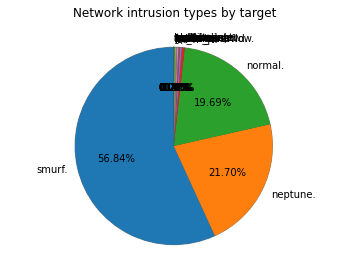


Network intrusion type counts (after categorical mapping):
dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: target_category, dtype: int64



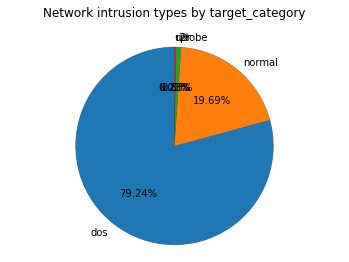

In [ ]:
# Define an array representing the intrusion types of the dataset
# Intrusion types: http://kdd.ics.uci.edu/databases/kddcup99/training_attack_types
# Request for the list of intrusion types of the dataset from an archive
dataset_intrusion_type_list = 'https://archive.ics.uci.edu/ml/machine-learning-databases/kddcup99-mld/training_attack_types'

# Store the list of intrusion types requested
dataset_intrusion_types = requests.get(dataset_intrusion_type_list)
# Output the list of features comprinsing the dataset
print("Dataset intrusion types:\n{0}".format(dataset_intrusion_types.text))

# Define a dictionary representing the types of the intrusion comprising the dataset
intrusion_types = {}

# Split the intrusion types of the dataset for new line character
dataset_intrusion_types_split_lines = dataset_intrusion_types.text.splitlines()

# For every intrusion in the intrusion type list, do the following
for intrusion in range(0, len(dataset_intrusion_types_split_lines) - 1):
    # Split the line into the intrusions type and its associated category
    dataset_intrusion_types_split = dataset_intrusion_types_split_lines[intrusion].split() 

    # Store the intrusions type and corresponding category in the dictionary
    intrusion_types[dataset_intrusion_types_split[0]] = dataset_intrusion_types_split[1]

# Manually assign the intrusion type representing a good connection
intrusion_types['normal'] = 'normal'


# Ouput network intrusion types method
def output_intrusion_types(feature_name, dataset):
  # Store the count (frequency) of the feature name passed, in the passed dataset
  feature_value_count = dataset[feature_name].value_counts()

  # Define the chart labels and relevant values for plotting
  chart_labels = feature_value_count.index.tolist()
  chart_values = feature_value_count.values.tolist()

  # Create a pie chart instance configured with the chart values and labels prepared 
  plt.pie(x=chart_values, labels=chart_labels, startangle=90, autopct='%.2f%%', shadow=True, radius=1800)
  
  # Configure the plot properties of the pie chart
  plt.axis('equal')
  plt.title("Network intrusion types by {0}\n".format(feature_name))
  #plt.legend()
  
  # Output data compiled in the pie chart
  #plt.rcParams["figure.figsize"] = (10,3)
  plt.show()


# Output the intrusion type dictionary processed
print("Network intrusion types: {0}\n".format(intrusion_types))

# Ouptut the counts of the network intrusion types as individual types (before categorical mapping)
print("Network intrusion type counts (before categorical mapping):\n{0}\n".format(kdd_dataset.target.value_counts()))

# Output the target types of the network intrusions
output_intrusion_types('target', kdd_dataset)


# Map the categories of each intrustion type to the intrusion types comprising the dataset (reduce classification complexity)
# Results in 5 classes as opposed to the original 23
kdd_dataset['target_category'] = kdd_dataset.target.apply(lambda intrusion : intrusion_types[intrusion[0:-1]])

# Ouptut the counts of the network intrusion types as their associated categories (after categorical mapping)
print("\nNetwork intrusion type counts (after categorical mapping):\n{0}\n".format(kdd_dataset.target_category.value_counts()))

# Output the categories of the target types of the network intrusions
output_intrusion_types('target_category', kdd_dataset)

### *Acknowledging the data types comprising the KDD dataset*

In [ ]:
# Output the data types comprising the dataset
# Identify the continuous and categorical data types in the dataset
print("Data types of each of the features comprising the dataset:")
kdd_dataset.dtypes

Data types of each of the features comprising the dataset:


duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

# **KDD Cup 1999 dataset, pre-processing the dataset**
---

### *Detect outlying data in the KDD dataset*

In [ ]:
# Check for missing (outlying) values in the dataset
# Missing values would render the dataset incomplete, where the packet(s) of data reponsible would need to be removed from the dataset
# A 'null' count would indicate the absence of values in the dataset
print("Counts of missing (null) values in each of the features comprising the dataset:")
kdd_dataset.info()

Counts of missing (null) values in each of the features comprising the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 n

In [ ]:
# Missing values would render the dataset incomplete, where the packet(s) of data reponsible would need to be removed from the dataset
# A cumulative count higher than the value of '0' would indicate the absence of values in the dataset
print("Counts of missing (null) values in each of the features comprising the dataset:")
kdd_dataset.isna().sum()

Counts of missing (null) values in each of the features comprising the dataset:


duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
# Remove features with missing (null) values
kdd_dataset = kdd_dataset.dropna('columns')

# Output the number of features comprising the dataset
print("Dataset now has {0} features".format(kdd_dataset.shape[1]))

# Return the first 'n' number of rows of the dataset specified
# Used to check whether the dataset has been compiled correctly with the assigned heading labels 
kdd_dataset.head(n=10)

Dataset now has 43 features


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,target_category
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.00,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.,normal
5,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,59,59,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.,normal
6,0,tcp,http,SF,212,1940,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,69,1.0,0.0,1.00,0.04,0.0,0.0,0.0,0.0,normal.,normal
7,0,tcp,http,SF,159,4087,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11,79,1.0,0.0,0.09,0.04,0.0,0.0,0.0,0.0,normal.,normal
8,0,tcp,http,SF,210,151,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8,89,1.0,0.0,0.12,0.04,0.0,0.0,0.0,0.0,normal.,normal
9,0,tcp,http,SF,212,786,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8,99,1.0,0.0,0.12,0.05,0.0,0.0,0.0,0.0,normal.,normal


### *Explore the categorical features of the KDD dataset*

In [ ]:
# Analyse the dataset (feature analysis), useful for informing feature encoding when pre-processing the dataset
# Inspired by: https://www.youtube.com/watch?v=VgyKQ5MTDFc&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN
# The analysis looks at how many unique values are present in each feature of the dataset
# For example, duration, which is a numeric value (discrete), has 2495 unique values, and there is a 0% overlap (similarity) 
# A textual/ categorical value such as protocol_type only has a few unique values, and the program shows the percentages of each types contribution to the feature
# Features with a large number of unique values do not have their item counts shown, to save display space in the output window (prevents excessive scrolling)

# Expand the feature for analysing the contribution of each of its categories method
# Understand the occupation that each feature category has to the number of values it contains summarily
def feature_category_expansion(feature_values):
    # Define a results array for the feature passed
    result = []

    # Store the counts of the values of the feature passed
    feature_value_counts = feature_values.value_counts()
    # Store the total number of values that the feature contains
    total_values = float(len(feature_values))

    # For each value in the feature value counts array, do the following
    for value in feature_value_counts.index:
        # Append the value and the percentage of contribution that the value has to the feature passed
        result.append("{}: {}%".format(value, round(100 * (feature_value_counts[value] / total_values), 2)))
    
    # Return the results for the feature passed
    return "[{}]".format(", ".join(result))
        

# Analyse the dataset by each of its features method
def dataset_feature_analysis(dataset):
    # Store the number of features comprising the dataset
    features = dataset.columns.values
    # Store the number of rows of data that are employed by the dataset
    dataset_rows = float(len(dataset))
    
    # Ouptut notice regarding the methods ouptut
    print("Dataset feature value uniqueness (count), similarity (overlap %) and occupancy (contribution %), for all current {} features of the dataset:".format(len(features)))

    # For every feature in the dataset, do the following
    for feature in features:
        # Store the unique values in the currently iterated feature
        unique_values = dataset[feature].unique()
        # Extract the count of unique values in the currently iterated feature
        unique_count = len(unique_values)
        
        # If the number of unique values comprising the currently iterated feature is greater than '100' values (for scroll efficiency in the output window), do the following
        if unique_count > 100:
            # Output the name of the currently iterated feature, its count of unique values and the representative percentage of uniqueness
            print("** {}: {} ({}%)".format(feature, unique_count, int(((unique_count) / dataset_rows) * 100)))
        
        # Else if the number of unique values comprising the currently iterated feature is smaller than '100' values, do the following
        else:
            # Output the name of the currently iterated feature, and its categorical expansion results
            print("** {}: {}".format(feature, feature_category_expansion(dataset[feature])))


# Analyse the KDD datset
dataset_feature_analysis(kdd_dataset)

Dataset feature value uniqueness (count), similarity (overlap %) and occupancy (contribution %), for all current 43 features of the dataset:
** duration: 2495 (0%)
** protocol_type: [icmp: 57.41%, tcp: 38.47%, udp: 4.12%]
** service: [ecr_i: 56.96%, private: 22.45%, http: 13.01%, smtp: 1.97%, other: 1.46%, domain_u: 1.19%, ftp_data: 0.96%, eco_i: 0.33%, ftp: 0.16%, finger: 0.14%, urp_i: 0.11%, telnet: 0.1%, ntp_u: 0.08%, auth: 0.07%, pop_3: 0.04%, time: 0.03%, csnet_ns: 0.03%, remote_job: 0.02%, gopher: 0.02%, imap4: 0.02%, domain: 0.02%, discard: 0.02%, systat: 0.02%, iso_tsap: 0.02%, shell: 0.02%, echo: 0.02%, rje: 0.02%, sql_net: 0.02%, whois: 0.02%, printer: 0.02%, courier: 0.02%, nntp: 0.02%, mtp: 0.02%, netbios_ssn: 0.02%, sunrpc: 0.02%, klogin: 0.02%, vmnet: 0.02%, bgp: 0.02%, uucp_path: 0.02%, uucp: 0.02%, ssh: 0.02%, supdup: 0.02%, nnsp: 0.02%, hostnames: 0.02%, login: 0.02%, efs: 0.02%, daytime: 0.02%, link: 0.02%, netbios_ns: 0.02%, pop_2: 0.02%, ldap: 0.02%, http_443: 0.02%

In [ ]:
# Discover the categorical features of the dataset
# Store the numerical features of the dataset
numerical_features = kdd_dataset._get_numeric_data().columns
# Perform set intersection to identify the categorical features of the dataset
# Remove all numerical features from the dataset to extract the categorical features (set subtraction)
categorical_features = list(set(kdd_dataset.columns) - set(numerical_features))

# Define an array representing the categorical features comprising the dataset, for the feature mapping procedure ahead
categorical_feature_encoding = []

# Duplicate the categorical feature array for the feature mapping procedure ahead
# For every feature detected as being of a categorical data type in the dataset, do the following 
for feature in categorical_features:
  # Append the currenlty iterated feature to the categorical feature encoding array
  categorical_feature_encoding.append(feature)

# Remove the intrusion types and their associated categories from the list of categorical features extracted from the dataset
#categorical_features.remove('target')
#categorical_features.remove('target_category')

# Output the categorical features of the dataset
print("{0} of {1} features comprising the dataset are of categorical data types:".format(len(categorical_features), kdd_dataset.shape[1]))

# For every feature detected as being of a categorical data type in the dataset, do the following
for feature in categorical_features:
  # Output the name of the currently iterated feature
  print(feature)

5 of 43 features comprising the dataset are of categorical data types:
service
target_category
target
protocol_type
flag


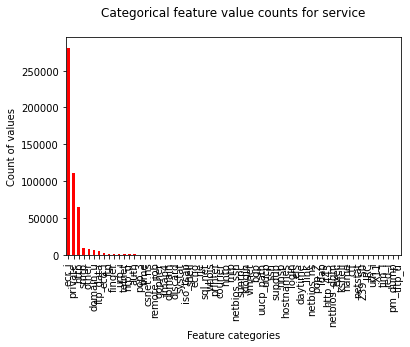

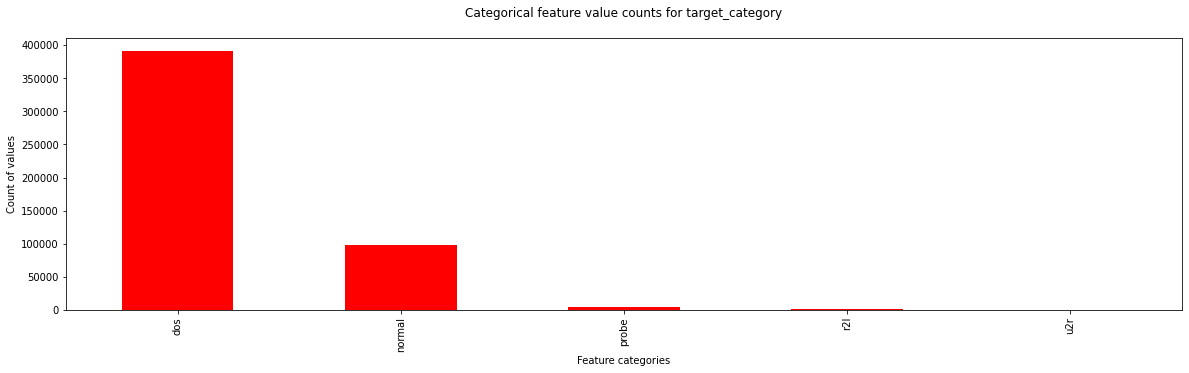

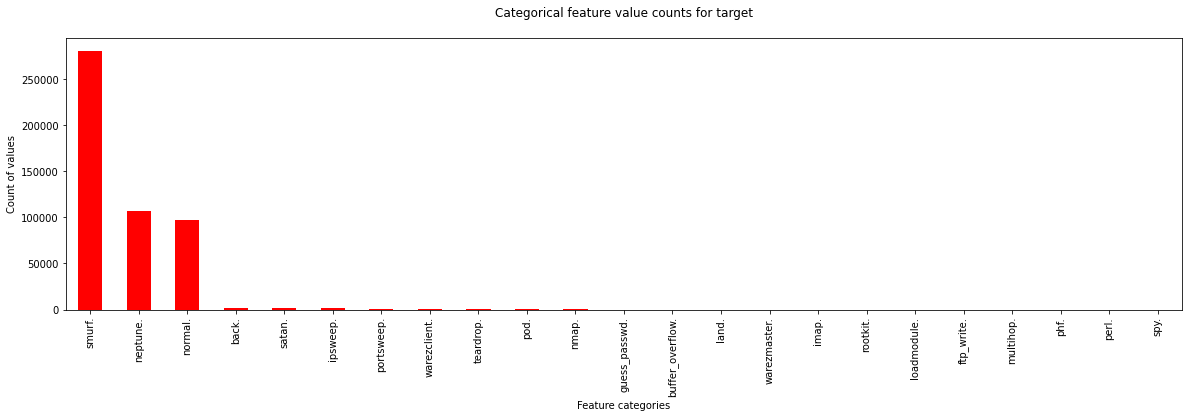

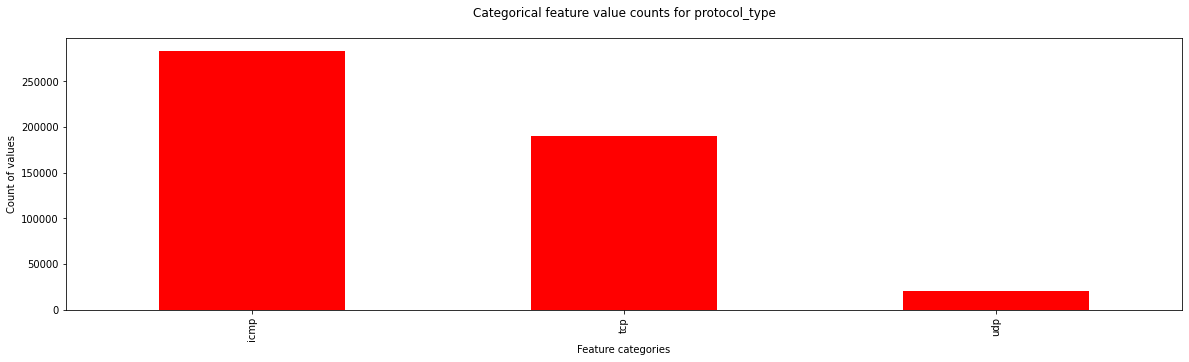

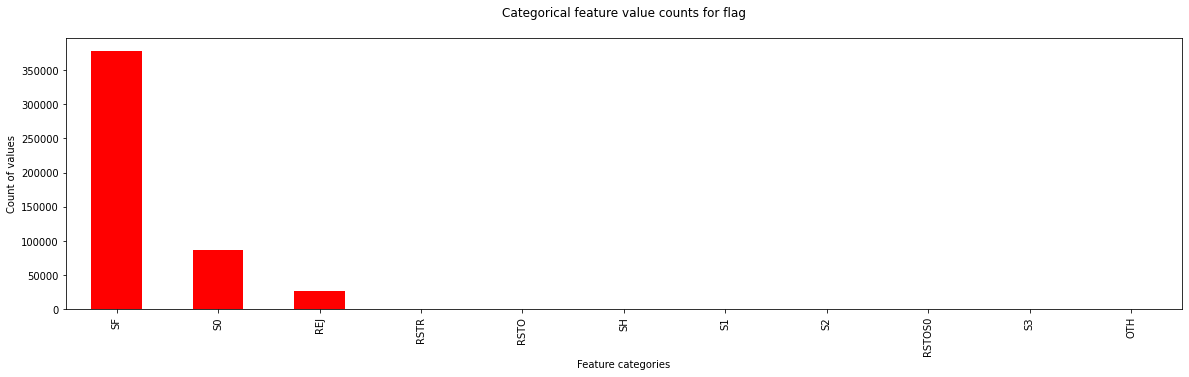

<Figure size 1440x360 with 0 Axes>

In [ ]:
# Output the value counts of a feature in the dataset method
def output_feature_value_counts(feature_name, dataset, x, y, colour='red'):
    # Store the count (frequency) of the feature passed, in the passed dataset
    dataset[feature_name].value_counts().plot(kind="bar", color=colour)

    # Configure the properties of the bar chart representative of the feature passed
    plt.title("Categorical feature value counts for {0}\n".format(feature_name))
    plt.ylabel('Count of values')
    plt.xlabel('Feature categories')
    plt.figure(figsize=(x,y))
    plt.tight_layout()
    # Output the bar chart plot
    #plt.show()

# For every feature detected as being of a categorical data type in the dataset, do the following
for feature in categorical_features:  
  # Output the value counts of the currently iterated categorical feature
  output_feature_value_counts(feature, kdd_dataset, 20, 5, 'red')

In [ ]:
# Identify binary categorised data amongst the dataset
# Binary features can be treated similarly like categorical data
# Define an array for storing bindary features detected in the dataset
binary_features = []

print("Numerical features that are bound by binary values in the dataset:")

# For every feature detected as being of a numerical data type in the dataset, do the following
for feature in numerical_features:
  # If the currently iterated numerical feature in the dataset has less than or equal to '2' values (binary), do the following
  if len(kdd_dataset[feature].unique()) <= 2:
      # Define a results array for the numerical feature passed
      result = []

      # Store the counts of the values of the currently iterated numerical feature
      feature_value_counts = kdd_dataset[feature].value_counts()
      # Store the total number of values that the currently iterated numerical feature contains
      total_values = float(len(kdd_dataset[feature]))
      
      # For each value in the feature value counts array, do the following
      for value in feature_value_counts.index:
          # Append the value and the percentage of contribution that the value has to the currently iterated numerical feature
          result.append("{} ({}%)".format(value, round(100 * (feature_value_counts[value] / total_values), 1)))
      
      # Output the results for the currently iterated numerical feature
      print("Feature: [{}]  Binary contribution: [{}]".format(feature, ", ".join(result)))
      
      # Append the currently iterated numerical feature to the array of binary features
      binary_features.append(feature)

# For every feature detected as being of a binary data type in the dataset, do the following 
for feature in binary_features:
  # Append the currently iterated feature to the array of categorical features
  categorical_features.append(feature)


# Output the categorical features of the dataset
print("\n{0} of {1} features comprising the dataset are now of categorical data types:".format(len(categorical_features), kdd_dataset.shape[1]))

# For every feature detected as being of a categorical data type in the dataset, do the following
for feature in categorical_features:
  # Output the name of the currently iterated feature
  print(feature)

Numerical features that are bound by binary values in the dataset:
Feature: [land]  Binary contribution: [0 (100.0%), 1 (0.0%)]
Feature: [logged_in]  Binary contribution: [0 (85.2%), 1 (14.8%)]
Feature: [root_shell]  Binary contribution: [0 (100.0%), 1 (0.0%)]
Feature: [num_outbound_cmds]  Binary contribution: [0 (100.0%)]
Feature: [is_host_login]  Binary contribution: [0 (100.0%)]
Feature: [is_guest_login]  Binary contribution: [0 (99.9%), 1 (0.1%)]

11 of 43 features comprising the dataset are now of categorical data types:
service
target_category
target
protocol_type
flag
land
logged_in
root_shell
num_outbound_cmds
is_host_login
is_guest_login


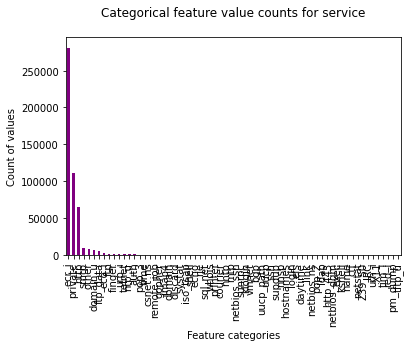

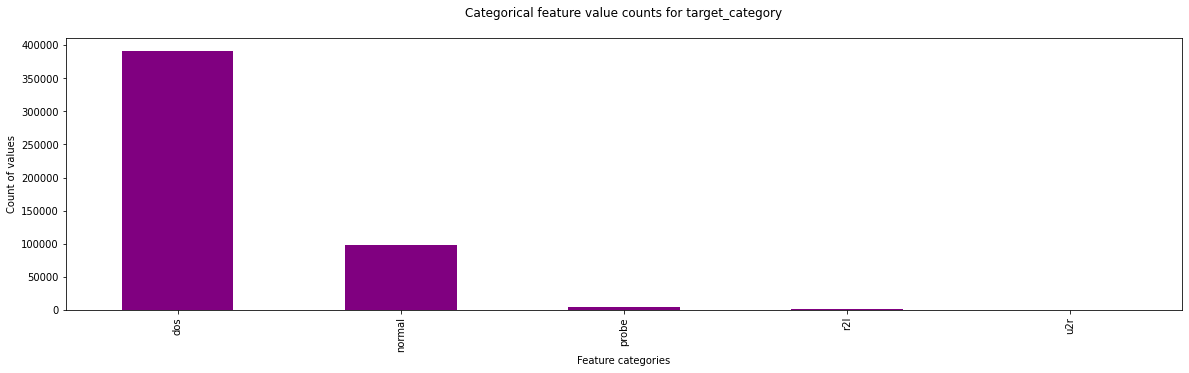

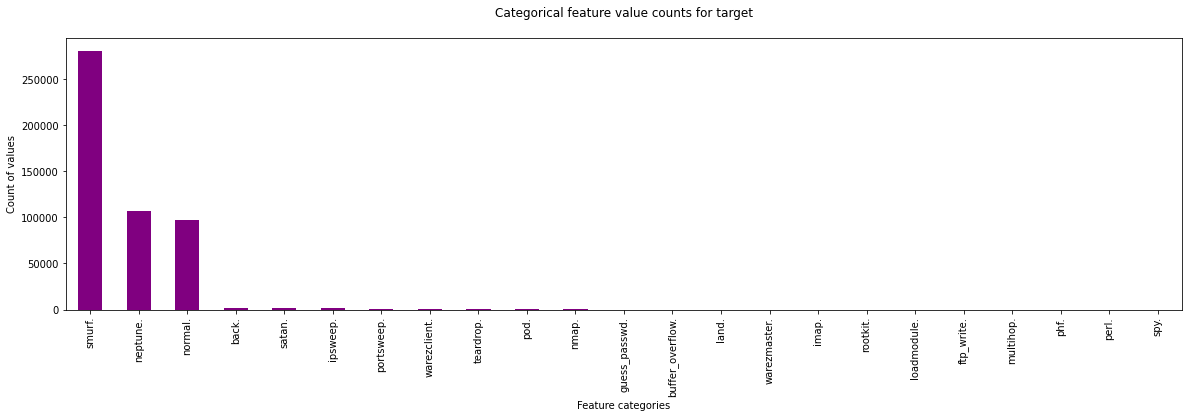

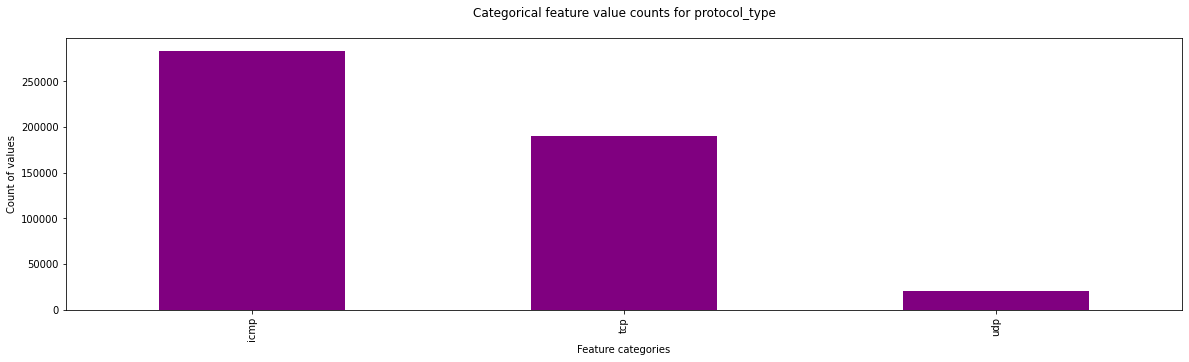

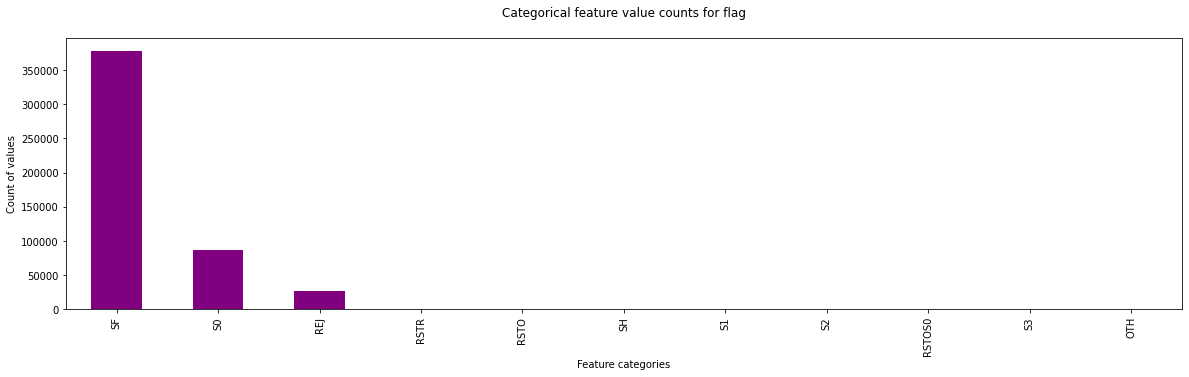

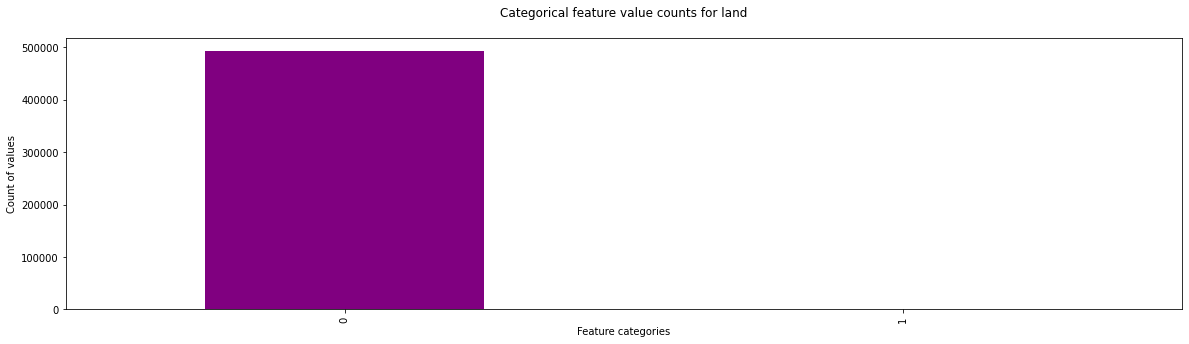

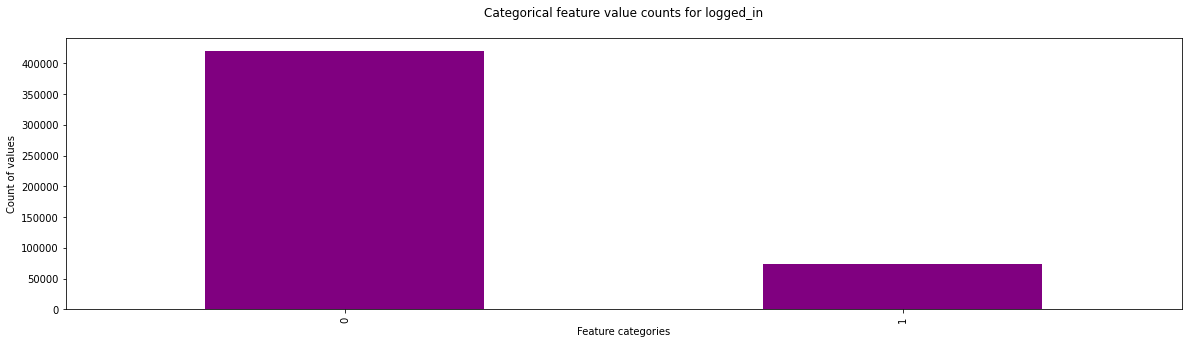

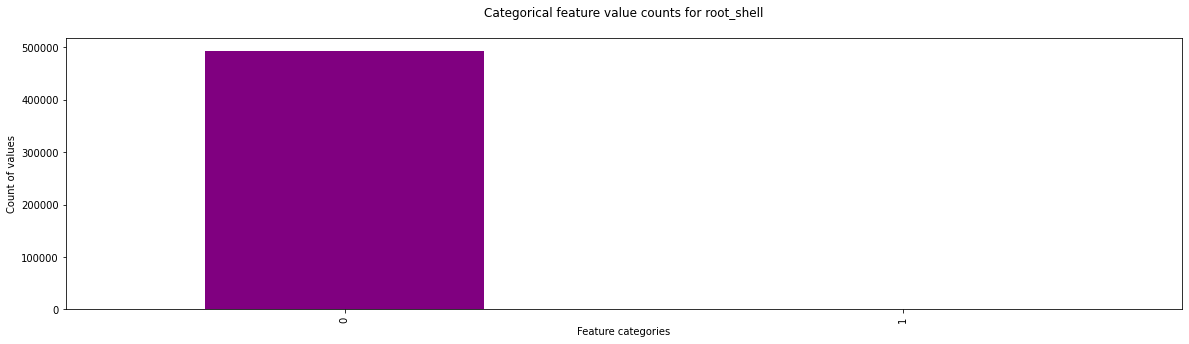

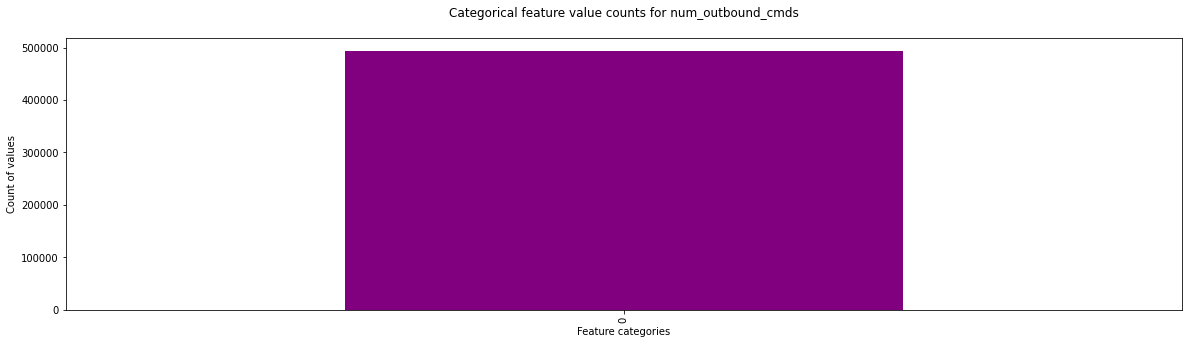

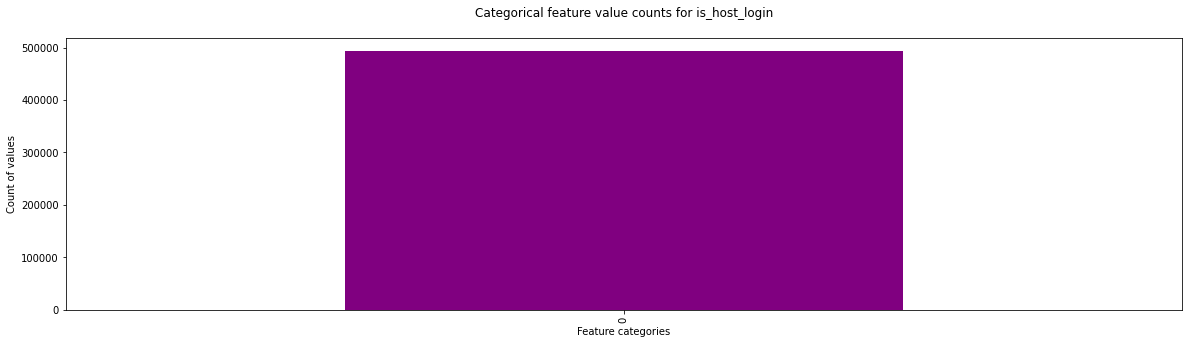

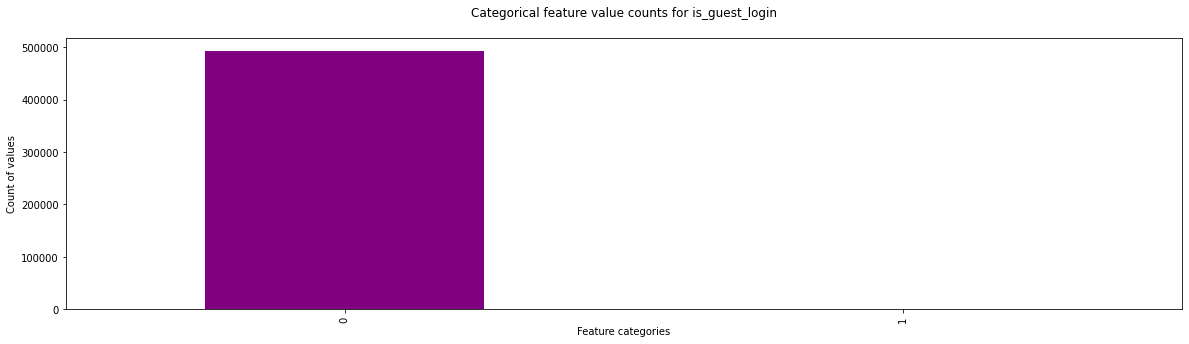

<Figure size 1440x360 with 0 Axes>

In [ ]:
# Re-evaluate the categorical features of the dataset
# For every feature detected as being of a categorical data type in the dataset, do the following
for feature in categorical_features:  
  # Output the value counts of the currently iterated categorical feature
  output_feature_value_counts(feature, kdd_dataset, 20, 5, 'purple')

### *Remove uncorrelated features from the KDD dataset*

In [ ]:
# Remove features that support constant values
# Features only sponsoring one value are non-impactful to the network as they do not correlate with other features
# Their presence in the dataset hinders the computational efficiency of training the network

# Store the number of features comprising the dataset
features_before_constant_removed = kdd_dataset.shape[1]

# Output notice regarding the features being removed from the dataset
print("Features removed from the dataset:")

# For every feature comprising the dataset, do the following
for feature in kdd_dataset:
  # If the currently iterated feature only has one unique value (constant), do the following
  if len(kdd_dataset[feature].unique()) <= 1:
    # Output the name of currently iterated feature
    print(feature)
    # Remove the feature from the dataset
    kdd_dataset.drop(feature, axis=1, inplace=True)

# Output the categorical features of the dataset
print("\n{0} of the {1} previous features now comprise the dataset".format(kdd_dataset.shape[1], features_before_constant_removed))

Features removed from the dataset:
num_outbound_cmds
is_host_login

41 of the 43 previous features now comprise the dataset


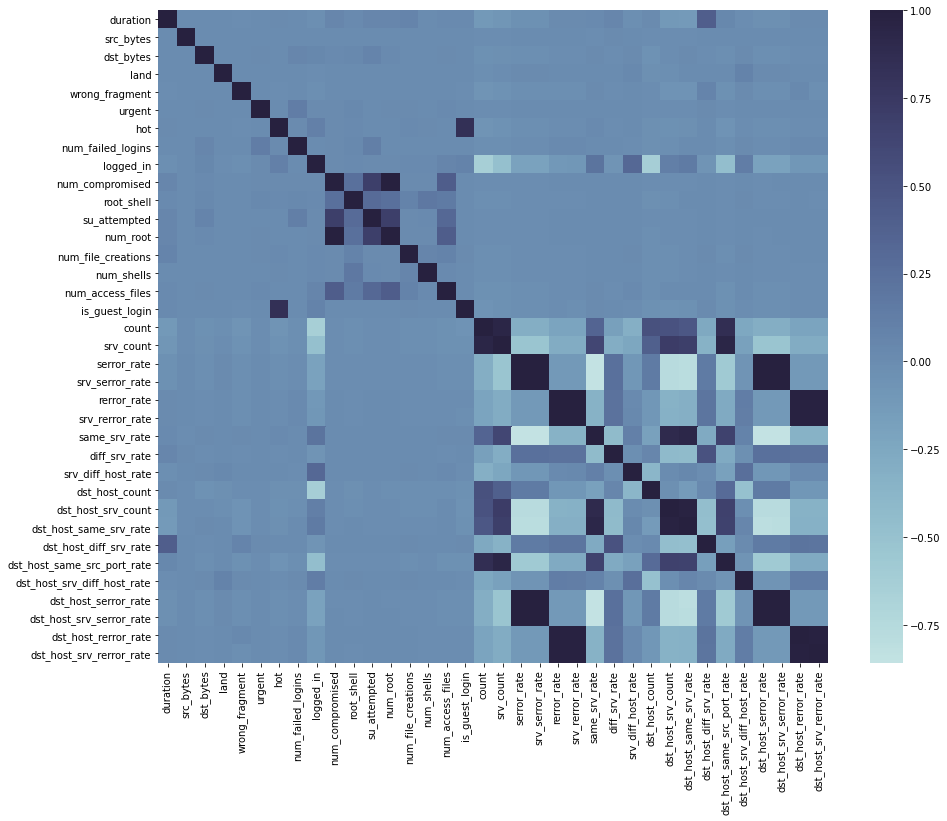

In [ ]:
# Remove features that are highly correlated
# Reduce the number of features supporting high numerical or categorical similarities
# Highly correlated features may or may not affect the accuracy of the model, such that correlated features may be correlated to the target, which you would want to maintain
# Less features reduces the dimensionality of the dataset, usually meaning a higher improvement in terms of the speed of training the network

# Determine the correlation of the features comprising the dataset
# Pearson Correlation Coefficient (PCC) - calculates the effect of change in one variable when the other variable changes
# It is a measurement of the strength of the relationship (correlation) between two variables and their association with each other
feature_correlation = kdd_dataset.corr(method='pearson')

# Plot the correlation matrix of the features comprising the dataset
plt.figure(figsize=(15, 12))
colour = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
sns.heatmap(feature_correlation, cmap=colour)
plt.show()

In [ ]:
# Find highly correlated features that comprise the dataset method
# Find features that change relative to when the other feature(s) change
# Inspired by: https://stackoverflow.com/questions/29294983/how-to-calculate-correlation-between-all-columns-and-remove-highly-correlated-on
def find_correlating_features(dataset, correlation_threshold):
    # Define a set representing the features of the dataset that are highly correlating
    # A set is targeted to prevent duplicate features from being considered when being removed from the dataset
    correlating_features = set()
    # Calculate and store the correlation matrix of the features comprising the dataset
    feature_correlation_matrix = dataset.corr()
    
    # For the column-wise dimensionality of the feature correlation matrix, do the following
    for i in range(len(feature_correlation_matrix.columns)):
        # For the row-wise dimensionality of the feature correlation matrix, do the following
        for j in range(i):
            # If the absolute value of the feature correlation at the currently iterated integer-location exceeds the correlation threshold given, do the following
            # Pearson Correlation Coefficient (PCC) can range between the bounds of [-1, 1] hence the absolute value is taken
            if abs(feature_correlation_matrix.iloc[i, j]) > correlation_threshold:
                # Store the name of the feature that is highly correlating with another feature in teh dataset
                feature_name = feature_correlation_matrix.columns[i]
                # Add the correlating feature to the array of correlating features comprising the dataset
                correlating_features.add(feature_name)

    # Return the correlating features of dataset
    return correlating_features


# Store the features found highly correlating with other features comprising the dataset
correlating_features = find_correlating_features(kdd_dataset, correlation_threshold=0.75) # 0.75 for multiclass, 0.95 for binary

# Output notice regarding the features being removed from the dataset
print("\nFeatures removed from the dataset:")

# For every feature detected as being highy correlating in the dataset, do the following
for feature in correlating_features:
  # Output the name of the currently iterated feature
  print(feature)

# Store the number of features comprising the dataset
features_before_correlation_removed = kdd_dataset.shape[1]

# Remove the highly correlating features from the dataset
#kdd_dataset = kdd_dataset.drop(correlating_features, axis=1)

# Output the categorical features of the dataset
print("\n{0} of the {1} previous features now comprise the dataset\n".format(kdd_dataset.shape[1], features_before_correlation_removed))

# Return the first 'n' number of rows of the dataset specified
# Used to check whether the dataset has been compiled correctly with the assigned heading labels 
kdd_dataset.head(n=10)


Features removed from the dataset:
num_root
dst_host_srv_count
dst_host_srv_rerror_rate
same_srv_rate
dst_host_same_srv_rate
srv_rerror_rate
dst_host_rerror_rate
dst_host_serror_rate
is_guest_login
dst_host_srv_serror_rate
srv_count
dst_host_same_src_port_rate
srv_serror_rate

41 of the 41 previous features now comprise the dataset



,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,target_category
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.00,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.,normal
5,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,59,59,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.,normal
6,0,tcp,http,SF,212,1940,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,69,1.0,0.0,1.00,0.04,0.0,0.0,0.0,0.0,normal.,normal
7,0,tcp,http,SF,159,4087,0,0,0,0,0,1,0,0,0,0,0,0,0,0,5,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11,79,1.0,0.0,0.09,0.04,0.0,0.0,0.0,0.0,normal.,normal
8,0,tcp,http,SF,210,151,0,0,0,0,0,1,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8,89,1.0,0.0,0.12,0.04,0.0,0.0,0.0,0.0,normal.,normal
9,0,tcp,http,SF,212,786,0,0,0,1,0,1,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8,99,1.0,0.0,0.12,0.05,0.0,0.0,0.0,0.0,normal.,normal


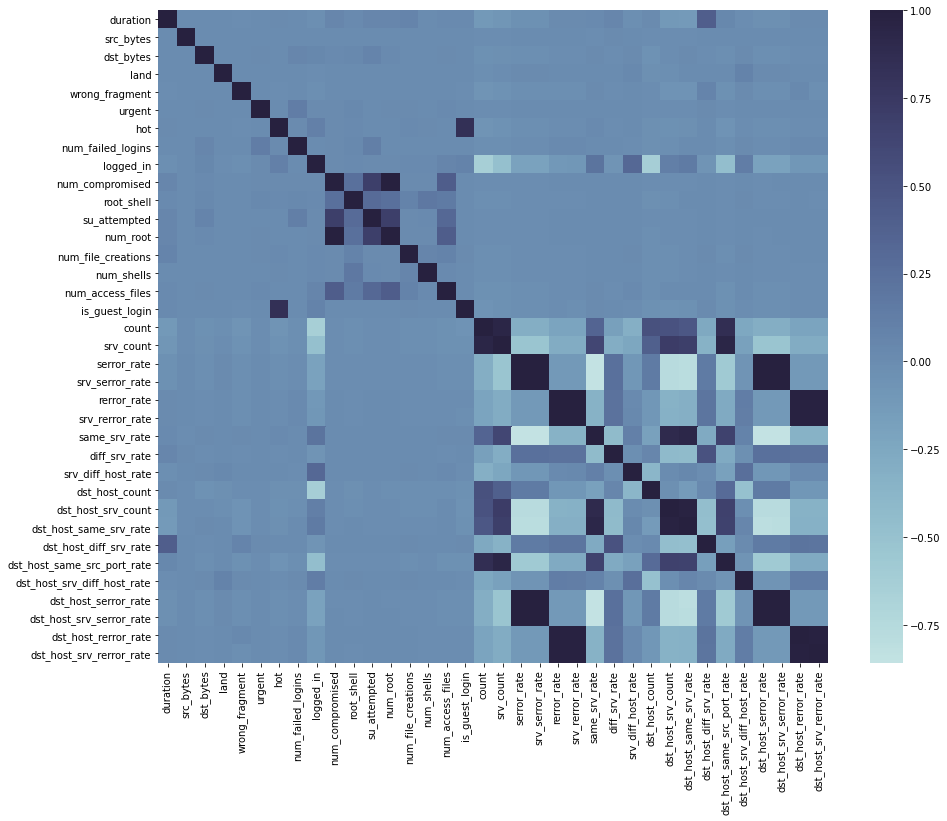

In [ ]:
# Determine the correlation of the features comprising the dataset
# Pearson Correlation Coefficient (PCC) - calculates the effect of change in one variable when the other variable changes
# It is a measurement of the strength of the relationship (correlation) between two variables and their association with each other
feature_correlation = kdd_dataset.corr(method='pearson')

# Plot the correlation matrix of the features comprising the dataset
plt.figure(figsize=(15, 12))
colour = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
sns.heatmap(feature_correlation, cmap=colour)
plt.show()

### *Feature map categorical data to numerical data (encoding) in the KDD dataset*

In [ ]:
# Define a label encoder object instance
# Encode feature labels (categorical) with values between '0' and 'n - 1' classes
label_encoder = LabelEncoder()

# Output notice regarding the features being removed from the dataset
print("Categorical features being mapped to numerical values:")

# Define a Boolean state representing whether binary classification is configured for the network model
binary_classification = False

# For every feature in the categorical feature encoding array, do the following
for feature in categorical_feature_encoding:
  # If binary classification is configured for the network model, do the following
  if binary_classification == True:
    # If the currently iterated feature is the intrusion type category feature, do the following
    if feature == 'target_category':
      # Define the feature map for the attack category feature of the dataset
      attack_category_feature_map = {'dos': 1, 'normal': 0, 'probe': 1, 'r2l': 1, 'u2r': 1}

      # Encode the currently iterated feature label and update the dataset
      kdd_dataset[feature] = kdd_dataset[feature].map(attack_category_feature_map)
    
    # Else if the currently iterated feature is not the intrusion type category feature, do the following
    else:
      # Encode the currently iterated feature label and update the dataset
      kdd_dataset[feature] = label_encoder.fit_transform(kdd_dataset[feature])
    
    # Output the name of the currently iterated feature
    print(feature)
    
  # Else if multiclass classification is configured for the network model, do the following
  else:
    # If the currently iterated feature is the intrusion type category feature of the dataset, do the following
    if feature not in ['target', 'target_category']:
      # Encode the currently iterated feature label and update the dataset
      kdd_dataset[feature] = label_encoder.fit_transform(kdd_dataset[feature])
      
      # When modeling multiclass classification problems using neural networks, it is good practice to reshape the output attribute from a vector, 
      # that contains values for each class value to be a matrix with a Boolean state for each class value and whether or not a given instance has that class value or not
      # This is called 'one hot encoding' or creating 'dummy features' from a categorical feature
      # We can do this by first encoding the strings consistently to integers using the scikit-learn class 'LabelEncoder'
      # Then convert the vector of integers to a 'one hot encoding' using the Keras function 'to_categorical()'
      # Inspired by: https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/

      # Convert the array of integer representations of the intrusion type categories into 'one hot encoding' arrays
      # E.g. '0' become [1 0 0 0 0], '2' becomes [0 1 0 0 0] and '3' becomes [0 0 1 0 0] 
      kdd_dataset[feature] = np_utils.to_categorical(kdd_dataset[feature])
  
      # Output the name of the currently iterated feature
      print(feature)


# Store the network intrusion feature map
network_intrusion_feature_map = kdd_dataset['target_category'].value_counts().index.tolist()

# Output the feature map of the network intrusion data type of the dataset
print("\nNetwork intrusion feature map:\n{0}".format(network_intrusion_feature_map))

# Output notice regarding the categorical features of the dataset being mapped to numerical values
print("\nCategorical features mapped to numerical featuers:")

# Return the first 'n' number of rows of the dataset specified
# Used to check whether the dataset has been compiled correctly with the assigned heading labels 
kdd_dataset.head(n=10)

Categorical features being mapped to numerical values:
service
protocol_type
flag

Network intrusion feature map:
['dos', 'normal', 'probe', 'r2l', 'u2r']

Categorical features mapped to numerical featuers:


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,target_category
0,0,0.0,0.0,0.0,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.00,0.0,0.0,0.0,0.0,normal.,normal
1,0,0.0,0.0,0.0,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0,normal.,normal
2,0,0.0,0.0,0.0,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.,normal
3,0,0.0,0.0,0.0,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.,normal
4,0,0.0,0.0,0.0,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.,normal
5,0,0.0,0.0,0.0,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,59,59,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.,normal
6,0,0.0,0.0,0.0,212,1940,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,69,1.0,0.0,1.00,0.04,0.0,0.0,0.0,0.0,normal.,normal
7,0,0.0,0.0,0.0,159,4087,0,0,0,0,0,1,0,0,0,0,0,0,0,0,5,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11,79,1.0,0.0,0.09,0.04,0.0,0.0,0.0,0.0,normal.,normal
8,0,0.0,0.0,0.0,210,151,0,0,0,0,0,1,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8,89,1.0,0.0,0.12,0.04,0.0,0.0,0.0,0.0,normal.,normal
9,0,0.0,0.0,0.0,212,786,0,0,0,1,0,1,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8,99,1.0,0.0,0.12,0.05,0.0,0.0,0.0,0.0,normal.,normal


In [ ]:
# Check whether the categorical features of the dataset have been mapped to numerical values correctly
print("Categorical features mapped to numerical featuers:")
kdd_dataset.info()

Categorical features mapped to numerical featuers:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  float32
 2   service                      494021 non-null  float32
 3   flag                         494021 non-null  float32
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_com

### *Normalise the data and partition the KDD dataset into independant training and testing datasets*

In [ ]:
# Binary
# If binary classification is configured for the network model, do the following
if binary_classification == True:
  # Remove the intrusion type feature from the dataset
  kdd_dataset = kdd_dataset.drop(['target'], axis=1)

  # Define the testing dataset of the network model validation procedure
  network_intrusion_classification_categories = kdd_dataset[['target_category']]

  # Remove the intrusion category feature from the dataset
  kdd_dataset = kdd_dataset.drop(['target_category'], axis=1)

  # Define the training dataset of the network model training procedure
  network_packet_information = kdd_dataset

# Multiclass
# Else if multiclass classification is configured for the network model, do the following
else:
  # Store the network packet features of the dataset only (drop the intrusion type and the intrustion type category features)
  network_packet_features = kdd_dataset.columns.drop(['target', 'target_category'])
  # Store the network packet information of the dataset, used for training the network
  network_packet_information = kdd_dataset[network_packet_features].values

  # Store the 'one hot encoded' array representations of the intrusion type category feature of the dataset
  intrusion_type_category_dummies = pd.get_dummies(kdd_dataset['target_category'])
  # Store the network intrusion type categories of the dataset, used for classifying the network intrusions (packets)
  network_intrusion_classification_categories = intrusion_type_category_dummies.values


# Normalise the feature data of the dataset
# Transform features by scaling each feature to a given range
# Inspired by: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
# Define a feature scalar object instance 
feature_scalar = MinMaxScaler()
# Normalise the feature data and transform it
# The transformation is given by:
#     X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
#     X_scaled = X_std * (max - min) + min
network_packet_information = feature_scalar.fit_transform(network_packet_information)

# Reduce the linear dimensionality of the dataset
# Linear dimensionality reduction using Singular Value Decomposition (SVD) of the data to project it to a lower dimensional space    
#     Feature elimination - remove features that have no contribution to classification (prediction)
#     Feature extraction - create new features based upon existing features in the dataset
# For use when you want to reduce the dimensionality of the dataset but you dont care what features are removed
# For when you want to ensure that the features do not correlate with one another
# Hastens the rate of the training procedure of the network model by creating a reduced set of variables (principal factors)
# Increasing interpretability of data but at the same time minimises the loss of information; does so by creating new uncorrelated variables that successively maximises the variance between them
# Inspired by: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
#principal_component_analysis = PCA(n_components=30)
#network_packet_information = principal_component_analysis.fit_transform(network_packet_information)

# Split the dataset into independant testing and training datasets
# Split arrays or matrices into random train and test subsets
# Inspired by: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
input_training_dataset, input_testing_dataset, output_training_dataset, output_testing_dataset = train_test_split(network_packet_information, network_intrusion_classification_categories, test_size=0.2)

# Output the training and testing dataset row-wise and column-wise representations
print("\nInput dataset data structure:\nTraining [{0} rows | {1} column(s)]  Testing [{2} rows | {3} column(s)]"
      .format(input_training_dataset.shape[0], input_training_dataset.shape[1], input_testing_dataset.shape[0], input_testing_dataset.shape[1]))

print("\nOutput dataset data structure:\nTraining [{0} rows | {1} column(s)]  Testing [{2} rows | {3} column(s)]"
      .format(output_training_dataset.shape[0], output_training_dataset.shape[1], output_testing_dataset.shape[0], output_testing_dataset.shape[1]))


Input dataset data structure:
Training [395216 rows | 39 column(s)]  Testing [98805 rows | 39 column(s)]

Output dataset data structure:
Training [395216 rows | 5 column(s)]  Testing [98805 rows | 5 column(s)]


In [ ]:
# Output a sample of the input training dataset structure (framing)
print("Data structure sample of the input training dataset:")
pd.DataFrame(input_training_dataset)

Data structure sample of the input training dataset:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
0,0.0,0.0,0.0,0.0,1.514331e-07,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.0,0.0,0.0,0.0,1.00,0.00,0.0,1.0,0.894118,0.89,0.01,0.01,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000e+00,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.228963,0.033268,1.0,1.0,0.0,0.0,0.15,0.06,0.0,1.0,0.066667,0.07,0.06,0.00,0.0,1.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,7.499542e-07,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0,0.0,0.0,0.0,1.00,0.00,0.0,1.0,1.000000,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.488371e-06,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0,0.0,0.0,0.0,1.00,0.00,0.0,1.0,1.000000,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.488371e-06,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0,0.0,0.0,0.0,1.00,0.00,0.0,1.0,1.000000,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395211,0.0,0.0,0.0,0.0,0.000000e+00,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.428571,0.019569,0.0,0.0,1.0,1.0,0.05,0.06,0.0,1.0,0.039216,0.04,0.07,0.00,0.0,0.0,0.0,1.0,1.0
395212,0.0,0.0,0.0,0.0,4.038215e-08,0.0000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023483,0.023483,0.0,0.0,0.0,0.0,1.00,0.00,0.0,1.0,0.047059,0.05,0.01,0.05,0.0,0.0,0.0,0.0,0.0
395213,0.0,0.0,0.0,0.0,0.000000e+00,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.195695,0.003914,1.0,1.0,0.0,0.0,0.02,0.07,0.0,1.0,0.007843,0.01,0.06,0.00,0.0,1.0,1.0,0.0,0.0
395214,0.0,1.0,0.0,0.0,1.488371e-06,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0,0.0,0.0,0.0,1.00,0.00,0.0,1.0,1.000000,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0


# **Configure the Neural Network (NN) model**

---

### *Build the Neural Network (NN) model*



In [ ]:
# Define an array representing the avialable optimiser algorithms for the neural network model
# Inspired by: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
optimser_algorithms = ['adadelta', 'adagrad', 'adam', 'adamax', 'ftrl', 'nadam', 'rmsprop', 'sgd']

# Define the hyperparameters of the binary classifiction neural network model
binary_neuron_counts =                [50, 50, 50, 50, network_intrusion_classification_categories.shape[1]]
binary_input_dimensions =             network_packet_information.shape[1]
# Layer transfer functions
# Inspired by: https://www.tensorflow.org/api_docs/python/tf/keras/activations
binary_activation_functions =         ['relu', 'relu', 'relu', 'softmax', 'sigmoid']
binary_kernel_initialiser =           'random_uniform'
binary_loss_function =                'binary_crossentropy'
binary_optimiser_algorithm =          optimser_algorithms[2]
binary_model_evaluation_metrics =     ['accuracy']
binary_batch_size =                   128
binary_epochs =                       50

# Define the hyperparameters of the multiclass classifiction neural network model
multiclass_neuron_counts =            [32, 32, 32, 5, network_intrusion_classification_categories.shape[1]]
multiclass_input_dimensions =         network_packet_information.shape[1]
# Layer transfer functions
# Inspired by: https://www.tensorflow.org/api_docs/python/tf/keras/activations
multiclass_activation_functions =     ['relu', 'relu', 'relu', 'softmax', 'sigmoid']
multiclass_kernel_initialiser =       'random_uniform'
multiclass_loss_function =            'categorical_crossentropy'
multiclass_optimiser_algorithm =      optimser_algorithms[2]
multiclass_model_evaluation_metrics = ['accuracy']
multiclass_batch_size =               128
multiclass_epochs =                   50

# Define a Boolean state reprsenting whether K-fold Cross Validation (CV) is being used to determine the training dataset of the neural network model
cross_validation_active = False


# Build a neural network model method
def build_neural_network_model():
  # Define an neural network model object instance, of type sequential
  # Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor
  # Inspired by: https://keras.io/guides/sequential_model/
  neural_network_model = Sequential()

  # Binary
  # If binary classification is configured for the network model, do the following
  if binary_classification == True:
    # Configure the sequential architecture of the neural network model
    # Dense layers are otherwise known as fully-connected layers (FCL's) where all neurons (nodes) between each layer are connected by weighted connections
    neural_network_model.add(Dense(binary_neuron_counts[0], activation=binary_activation_functions[0], kernel_initializer=binary_kernel_initialiser, input_dim=binary_input_dimensions))
    neural_network_model.add(Dense(binary_neuron_counts[1], activation=binary_activation_functions[1], kernel_initializer=binary_kernel_initialiser))
    neural_network_model.add(Dense(binary_neuron_counts[2], activation=binary_activation_functions[2], kernel_initializer=binary_kernel_initialiser))
    # Normalise the outputs
    # Normalise a vector of 'n' real-values into a vector of 'n' real values that sum to 1 
    # Input values can be positive, negative, zero, or greater than one, but the softmax transforms them into values between 0 and 1, so that they can be interpreted as probabilities
    neural_network_model.add(Dense(binary_neuron_counts[3], activation=binary_activation_functions[3]))
    # Predict the category of the intrusion type (classification)
    neural_network_model.add(Dense(binary_neuron_counts[4], activation=binary_activation_functions[4], kernel_initializer=binary_kernel_initialiser))

    # Configure the neural network model for the training phase
    neural_network_model.compile(loss=binary_loss_function, optimizer=binary_optimiser_algorithm, metrics=binary_model_evaluation_metrics)

  # Multiclass
  # Else if multiclass classification is configured for the network model, do the following
  else:
    # Configure the architecture of the neural network model
    # Dense layers are otherwise known as fully-connected layers (FCL's) where all neurons (nodes) between each layer are connected by weighted connections
    neural_network_model.add(Dense(multiclass_neuron_counts[0], activation=multiclass_activation_functions[0], kernel_initializer=multiclass_kernel_initialiser, input_dim=multiclass_input_dimensions))
    neural_network_model.add(Dense(multiclass_neuron_counts[1], activation=multiclass_activation_functions[1], kernel_initializer=multiclass_kernel_initialiser))
    neural_network_model.add(Dense(multiclass_neuron_counts[2], activation=multiclass_activation_functions[2], kernel_initializer=multiclass_kernel_initialiser))
    # Normalise the outputs
    # Normalise a vector of 'n' real-values into a vector of 'n' real values that sum to 1 
    # Input values can be positive, negative, zero, or greater than one, but the softmax transforms them into values between 0 and 1, so that they can be interpreted as probabilities
    neural_network_model.add(Dense(multiclass_neuron_counts[3], activation=multiclass_activation_functions[3]))
    # Predict the category of the intrusion type (classification)
    neural_network_model.add(Dense(multiclass_neuron_counts[4], activation=multiclass_activation_functions[4], kernel_initializer=multiclass_kernel_initialiser))

    # Configure the neural network model for the training phase
    neural_network_model.compile(loss=multiclass_loss_function, optimizer=multiclass_optimiser_algorithm, metrics=multiclass_model_evaluation_metrics)

  # Return the neural network configured
  return neural_network_model

### *Train the Neural Network (NN) model using K-fold Cross Validation (CV)*

In [ ]:
# K-fold Cross Validation (CV)
# Cross Validation is a resampling procedure used to evaluate machine learning models on a limited data sample
# K that refers to the number of groups (folds) that a given data sample is to be partitioned into
# Cross Validation is primarily used in applied to estimate the skill of a machine learning model on unseen data 
# Use a limited sample in order to estimate how the model is expected to perform in general (generalisation capabiltiy),
# when used to make predictions on data not used during the training of the model
# Inspired by: https://machinelearningmastery.com/k-fold-cross-validation/

# If K-fold Cross Validation (CV) is being used to determine the training dataset of the model, do the following
if cross_validation_active == True:
  # Define the number (K) of folds that the dataset is to be partitioned into
  k_dataset_folds = 10

  # Define a K-fold cross-validator instance
  # Specify the number of folds of the data that will be produced from the dataset 
  k_fold = KFold(n_splits=k_dataset_folds, shuffle=False)

  # Define a counter representing the K-th fold being used to train the neural network model
  kth_fold = 1

  # Define an array representing the accuarcies of the neural network model when trained on each training fold of the dataset
  training_fold_accuracies = []
  # Define an array representing the losses (errors) of the neural network model when trained on each training fold of the dataset
  training_fold_losses = []
  # Define an array representing the training folds of the dataset, used to train the neural network model
  training_folds = []
  # Define an array representing the 
  histories = []

  # Concatenate the network packet information data, previously split into separate training and testing partitions 
  input_dataset = np.concatenate((input_training_dataset, input_testing_dataset), axis=0)
  # Concatenate the intrusion type category data, previously split into separate training and testing partitions
  output_dataset = np.concatenate((output_training_dataset, output_testing_dataset), axis=0)

  # Define the number of epochs considered for training the neural network model
  k_fold_epcohs = 5

  # For every training and testing fold comprising the dataset (relative to K-folds specified), do the following
  for training_fold, testing_fold in k_fold.split(input_dataset, output_dataset):
    # Define a neural network model instance
    neural_network_model = build_neural_network_model()
    
    # Output notice regarding the model training procedure
    print("Model training for {0} epochs...".format(k_fold_epcohs))

    # Binary
    # If binary classification is configured for the network model, do the following
    if binary_classification == True:
      # Stop training the model when its validation loss of information metric has stopped improving, overtime
      # Too many epochs can lead to overfitting of the training dataset, whereas too few may result in an underfit model 
      # Early stopping is a method that allows stoppage of model training once the model performance stops improving on a hold out validation dataset
      # Inspired by: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping
      monitor = EarlyStopping(monitor='loss', min_delta=1e-3, patience=5, verbose=1, mode='auto', restore_best_weights=False)

      # Record training loss values and metric values at successive epochs, as well as validation loss values and validation metrics values (if applicable)
      history = neural_network_model.fit(input_dataset[training_fold], output_dataset[training_fold], batch_size=binary_batch_size, epochs=k_fold_epcohs, validation_data=(input_dataset[testing_fold], output_dataset[testing_fold]), callbacks=[monitor], verbose=1)

      # Append the record of training loss values and metric values and the index of the Kth-fold
      histories.append([history, kth_fold])

    # Multiclass
    # Else if multiclass classification is configured for the network model, do the following
    else:
      # Stop training the model when its validation loss of information metric has stopped improving, overtime
      # Too many epochs can lead to overfitting of the training dataset, whereas too few may result in an underfit model 
      # Early stopping is a method that allows stoppage of model training once the model performance stops improving on a hold out validation dataset
      # Inspired by: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping
      monitor = EarlyStopping(monitor='loss', min_delta=1e-3, patience=5, verbose=1, mode='auto', restore_best_weights=False)

      # Record training loss values and metric values at successive epochs, as well as validation loss values and validation metrics values (if applicable)
      history = neural_network_model.fit(input_dataset[training_fold], output_dataset[training_fold], batch_size=multiclass_batch_size, epochs=k_fold_epcohs, validation_data=(input_dataset[testing_fold], output_dataset[testing_fold]), callbacks=[monitor], verbose=1)

      # Append the record of training loss values and metric values and the index of the Kth-fold
      histories.append([history, kth_fold])

    # Output notice regarding the model evaluation procedure
    print("\nModel performance is being evaluated...")

    # Evaluate the performance (accuracy) of the neural network model configured, using the Kth testing (validation) fold of the dataset
    # Determine the generalisation of the neural network model
    model_performance = neural_network_model.evaluate(input_dataset[testing_fold], output_dataset[testing_fold], verbose=1)
    
    # Append the training accuracy of the neural network model for the Kth training fold
    training_fold_accuracies.append(model_performance[1])
    # Append the training loss of the neural network model for the Kth training fold
    training_fold_losses.append(model_performance[0])
    # Append the Kth training fold used to train the neural network model
    training_folds.append([input_dataset[training_fold], output_dataset[training_fold]])

    # Output the performance of the neural network model for K-folds trained and evaluated
    print("Model performance for fold {0}: loss (error) of {1:.2f} classification accuracy of {2:.2f}%\n".format(kth_fold, model_performance[0], model_performance[1] * 100))

    # Increment the Kth-fold count
    kth_fold += 1

  # Store the index of the training fold that the neural network model performed best with (classification accuracy)
  optimum_training_fold_index = np.argmax(training_fold_accuracies, axis=0)

  # Store the row-wise structure of the training datatset before K-fold Cross Validation (CV) updates the training dataset
  training_dataset_before = input_training_dataset.shape[0]

  # Update the network packet information and intrusion type category data, used for training the neural network model
  input_training_dataset = training_folds[optimum_training_fold_index][0]
  output_training_dataset = training_folds[optimum_training_fold_index][1]

  # Store the row-wise structure of the training datatset after K-fold Cross Validation (CV) has updated the training dataset
  training_dataset_after = input_training_dataset.shape[0]

  # Output notice regarding the training fold that enabled the neural network model to perform best (classification accuracy)
  print("Model performance for fold {0} is best:\nClassification accuracy {1:.2f}%\nLoss of informstion (error): {2:.2f}".format(optimum_training_fold_index + 1,
                                                                                                                                  training_fold_accuracies[optimum_training_fold_index] * 100,
                                                                                                                                  training_fold_losses[optimum_training_fold_index]))

In [ ]:
# Plot a line graph representing model training history data method
def line_graph_plot(model_history, graph_subtitle):
    # Define the figure size for the graph plots
    plt.figure(figsize=(25,6))
    
    # Subplot model loss during training
    plt.subplot(1, 2, 1)
    plt.title('Loss')
    plt.plot(model_history.history['loss'], label='train', color='red')
    plt.text(0, model_history.history['loss'][0], "Initial Loss: " + str(round(model_history.history['loss'][0], 3)) + "%", backgroundcolor="black", color='white')
    plt.text(len(model_history.history['loss']) - 1, model_history.history['loss'][len(model_history.history['loss']) - 1], "Final Loss: " + str(round( model_history.history['loss'][len(model_history.history['loss']) - 1], 3)) + "%", backgroundcolor="black", color='white')
    plt.plot(model_history.history['val_loss'], label='test', color='green')
    plt.grid(True)
    plt.legend()
    
    # Subplot model accuracy during training
    plt.subplot(1, 2, 2)
    plt.title('Accuracy')
    plt.plot(model_history.history['accuracy'], label='train', color='red')
    plt.text(0, model_history.history['accuracy'][0], "Initial Accuracy: " + str(round(model_history.history['accuracy'][0], 3)) + "%", backgroundcolor="black", color='white')
    plt.text(len(model_history.history['accuracy']) - 1, model_history.history['accuracy'][len(model_history.history['accuracy']) - 1], "Final Accuracy: " + str(round( model_history.history['accuracy'][len(model_history.history['loss']) - 1], 3)) + "%", backgroundcolor="black", color='white')
    plt.plot(model_history.history['val_accuracy'], label='test', color='green')
    plt.grid(True)
    plt.legend()

    # Configure a subtitle for pair of line graph plots
    plt.suptitle(graph_subtitle, fontsize=23)
    
    # Output the line graph plots
    plt.show()


# If K-fold Cross Validation (CV) is being used to determine the training dataset of the model, do the following
if cross_validation_active == True:
  # For every record of training loss values and metric values in the histories array, do the following
  for history, fold in histories:
    # Plot the records of training loss values and metric values in the histories array
    line_graph_plot(history, 'Dataset Fold ' + str(fold))

In [ ]:
# If K-fold Cross Validation (CV) is being used to determine the training dataset of the model, do the following
if cross_validation_active == True:
  # Calculate the training dataset reduction amount from the original partition and when K-fold Cross Validation (CV) is applied
  training_dataset_reduction = ((training_dataset_before - training_dataset_after) / training_dataset_before) * 100
  # Output the training dataset reduction amount
  print("Training dataset has been reduced by {0:.2f}%!\nBefore: {1} rows of data\nAfter: {2} rows of data".format(training_dataset_reduction, training_dataset_before, training_dataset_after))

### *Train the Neural Network (NN) model*

In [ ]:
# Define a neural network model instance
neural_network_model = build_neural_network_model()

# Binary
# If binary classification is configured for the network model, do the following
if binary_classification == True:
  # Stop training the model when its validation loss of information metric has stopped improving, overtime
  # Too many epochs can lead to overfitting of the training dataset, whereas too few may result in an underfit model 
  # Early stopping is a method that allows stoppage of model training once the model performance stops improving on a hold out validation dataset
  # Inspired by: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping
  monitor = EarlyStopping(monitor='loss', min_delta=1e-3, patience=5, verbose=1, mode='auto', restore_best_weights=True)

  # Output notice regarding the model training procedure
  print("Model training for {0} epochs using 'binary' classification...".format(binary_epochs))

  # Record training loss values and metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable)
  history = neural_network_model.fit(input_training_dataset, output_training_dataset, batch_size=binary_batch_size, epochs=binary_epochs, validation_data=(input_testing_dataset, output_testing_dataset), callbacks=[monitor], verbose=1)

# Multiclass
# Else if multiclass classification is configured for the network model, do the following
else:
  # Stop training the model when its validation loss of information metric has stopped improving, overtime
  # Too many epochs can lead to overfitting of the training dataset, whereas too few may result in an underfit model
  # Early stopping is a method that allows stoppage of model training once the model performance stops improving on a hold out validation dataset
  # Inspired by: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping
  monitor = EarlyStopping(monitor='loss', min_delta=1e-3, patience=5, verbose=1, mode='auto', restore_best_weights=True)

  # Output notice regarding the model training procedure
  print("Model training for {0} epochs using 'multiclass' classification...".format(multiclass_epochs))

  # Record training loss values and metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable)
  history = neural_network_model.fit(input_training_dataset, output_training_dataset, batch_size=multiclass_batch_size, epochs=multiclass_epochs, validation_data=(input_testing_dataset, output_testing_dataset), callbacks=[monitor], verbose=1)

Model training for 50 epochs using 'multiclass' classification...
Epoch 1/50
3088/3088 [==============================] - 7s 2ms/step - loss: 0.3373 - accuracy: 0.9688 - val_loss: 0.0848 - val_accuracy: 0.9844
Epoch 2/50
3088/3088 [==============================] - 7s 2ms/step - loss: 0.0576 - accuracy: 0.9897 - val_loss: 0.0455 - val_accuracy: 0.9919
Epoch 3/50
3088/3088 [==============================] - 7s 2ms/step - loss: 0.0408 - accuracy: 0.9922 - val_loss: 0.0371 - val_accuracy: 0.9926
Epoch 4/50
3088/3088 [==============================] - 7s 2ms/step - loss: 0.0365 - accuracy: 0.9925 - val_loss: 0.0354 - val_accuracy: 0.9928
Epoch 5/50
3088/3088 [==============================] - 6s 2ms/step - loss: 0.0351 - accuracy: 0.9932 - val_loss: 0.0334 - val_accuracy: 0.9936
Epoch 6/50
3088/3088 [==============================] - 7s 2ms/step - loss: 0.0344 - accuracy: 0.9932 - val_loss: 0.0333 - val_accuracy: 0.9935
Epoch 7/50
3088/3088 [==============================] - 6s 2ms/step - 

### *Evaluate the performance of the Neural Network (NN) model*

*Neural Network (NN) model loss (error) and classification accuracy*

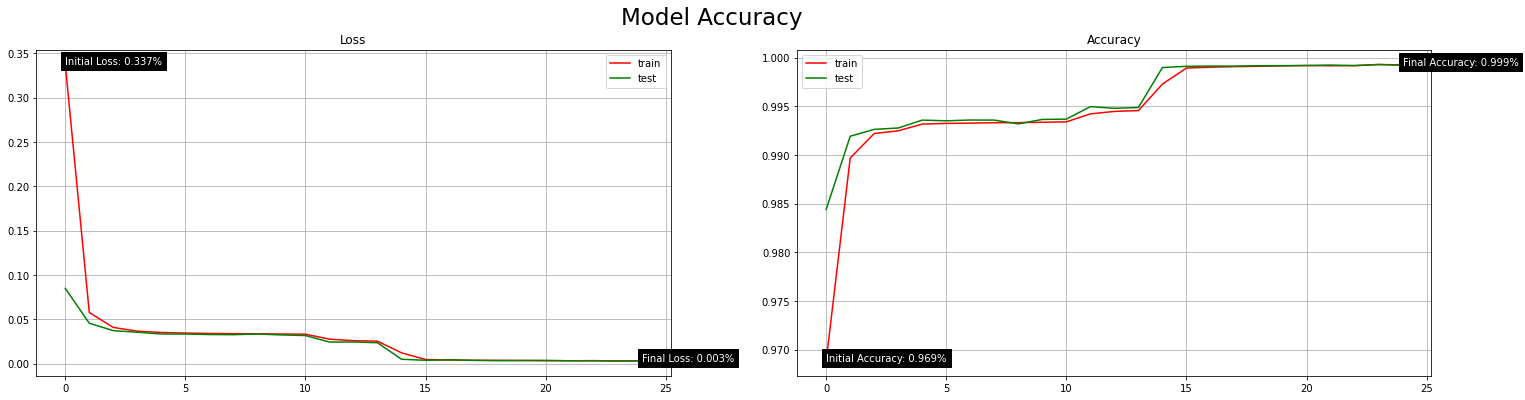

In [ ]:
# Plot the neural network models record of training loss values and metric values
line_graph_plot(history, 'Model Accuracy')

### *Validate the performance of the Neural Network (NN) model*

In [ ]:
# Evaluate the performance (accuracy) of the neural network model configured, using the testing (validation) dataset
model_performance = neural_network_model.evaluate(input_testing_dataset, output_testing_dataset)

# Output the accuracy and loss (error) data of the neural network model configured
print("\nNeural Network (NN) model numerical results:\nModel classification accuracy: {0:.2f}%\nLoss of information (error): {1:.3f}".format(model_performance[1] * 100, model_performance[0]))

3088/3088 [==============================] - 3s 1ms/step - loss: 0.0036 - accuracy: 0.9992

Neural Network (NN) model numerical results:
Model classification accuracy: 99.92%
Loss of information (error): 0.004


Neural Network (NN) model confusion matrix:


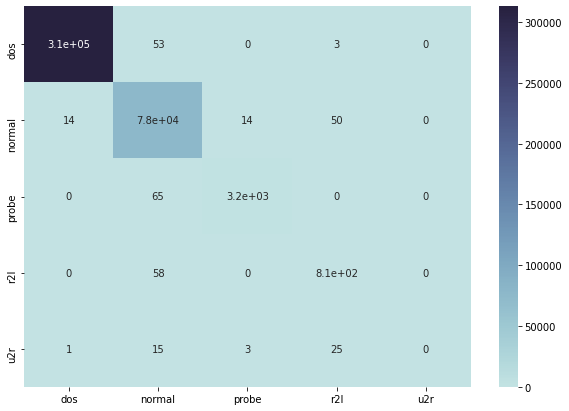

In [ ]:
# Plot the confusion (error) matrix of the neural network model configured
# N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes
# True Positive (TP) 
#    The predicted value matches the actual value
#    The actual value was positive and the model predicted a positive value
# True Negative (TN) 
#    The predicted value matches the actual value
#    The actual value was negative and the model predicted a negative value
# False Positive (FP) – Type 1 error
#    The predicted value was falsely predicted
#    The actual value was negative but the model predicted a positive value
#    Also known as the Type 1 error
# False Negative (FN) – Type 2 error
#    The predicted value was falsely predicted
#    The actual value was positive but the model predicted a negative value
#    Also known as the Type 2 error
# Inspired by: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

# Multiclass
# If multicalss classification is configured for the network model, do the following
if binary_classification == False:
  # Store the network intrusion type classification prediction of the neural network model
  network_intrusion_classification_prediction = neural_network_model.predict(input_training_dataset)

  # Define the labels of the confusion matrix
  labels = network_intrusion_feature_map

  # Compile the confusion matrix of the neural network model
  confusion_matrix = metrics.confusion_matrix(output_training_dataset.argmax(axis=1), network_intrusion_classification_prediction.argmax(axis=1))

  # Output the neural network models confusion matrix
  print("Neural Network (NN) model confusion matrix:")

  # Plot the confusion matrix as a heatmap figure
  plt.figure(figsize=(10, 7))
  colour = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
  sns.heatmap(confusion_matrix, annot=True, cmap=colour, xticklabels=labels, yticklabels=labels)